## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

### Creating Imbalanced Dataset

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

The code you've provided is using the `make_classification` function from the `sklearn.datasets` module in Python. This function is typically used to generate a synthetic dataset for classification tasks, where you have a set of input features (X) and corresponding labels (y) that indicate the class to which each data point belongs. Let me explain the function and its parameters:

```python
X, y = make_classification(
    n_samples=1000,            # Number of samples in the dataset
    n_redundant=0,             # Number of redundant features
    n_features=2,              # Number of informative features
    n_clusters_per_class=1,    # Number of clusters per class
    weights=[0.90],            # Class weights
    random_state=12            # Random seed for reproducibility
)
```

Here's a breakdown of each parameter:

1. `n_samples`: This parameter specifies the total number of samples or data points you want to generate in your synthetic dataset. In your case, you're generating 1000 samples.

2. `n_redundant`: This parameter controls the number of redundant features in the dataset. Redundant features are linear combinations of informative features and don't add new information to the dataset. Setting it to 0 means there are no redundant features in your dataset.

3. `n_features`: This parameter specifies the total number of informative features in the dataset. Informative features are the ones that are used to discriminate between classes. In your case, you have 2 informative features.

4. `n_clusters_per_class`: This parameter determines the number of clusters per class. It essentially controls how well-separated the classes are in the feature space. Setting it to 1 means that each class forms a single cluster, which makes the classes more distinct.

5. `weights`: This parameter allows you to specify the class distribution in your dataset. The value `[0.90]` means that 90% of the data points will belong to one class, and the remaining 10% will belong to the other class. This is used to create an imbalanced dataset where one class is more prevalent than the other.

6. `random_state`: This parameter sets the random seed for reproducibility. By providing a specific random seed (e.g., 12), you ensure that if you run this code again with the same seed, you'll get the same dataset. It's useful for debugging and ensuring consistent results.

So, in summary, this code generates a synthetic classification dataset with 1000 samples, 2 informative features, no redundant features, one cluster per class, and a class distribution where one class is 90% prevalent. This dataset can be used for classification tasks to test and evaluate machine learning models.

In [3]:
X,y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

X is the input where there are two independent features and y is the output which is a dependent feature.

In [11]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)

In [12]:
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [13]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [14]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

So we have created an imbalanced dataset

### Plotting the imbalanced dataset

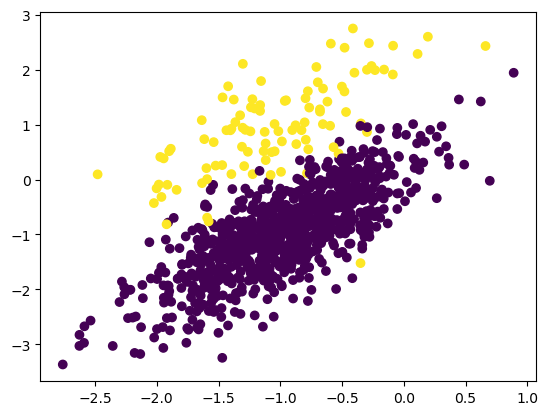

In [15]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [16]:
!pip install imblearn

     ------------------------------------ 235.6/235.6 kB 959.1 kB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

The code is using the Synthetic Minority Over-sampling Technique (SMOTE) to oversample a dataset, typically used in the context of addressing class imbalance in machine learning tasks. Let's break down what's happening step by step:

```python
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
```

Here's what each line of code is doing:

1. `oversample = SMOTE()`: This line initializes an instance of the SMOTE algorithm. SMOTE is a technique used to address class imbalance in a classification dataset. It stands for Synthetic Minority Over-sampling Technique. It works by generating synthetic samples for the minority class (the class with fewer instances) to balance the class distribution.

2. `X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])`: This line performs the actual oversampling of the dataset.

   - `final_df[['f1', 'f2']]`: This part of the code selects the feature columns 'f1' and 'f2' from the DataFrame `final_df`. These columns are used as input features for your machine learning model.

   - `final_df['target']`: This part selects the target or label column from the DataFrame `final_df`. The 'target' column typically contains the class labels (e.g., 0 or 1 for binary classification) indicating the class to which each data point belongs.

   - `oversample.fit_resample(...)`: This method is called on the `oversample` object (which is an instance of SMOTE). It applies the SMOTE algorithm to the feature and target data. SMOTE generates synthetic samples for the minority class to balance the class distribution.

   - `X, y = ...`: The oversampled feature and target data are assigned to the variables `X` and `y`, respectively. These oversampled data can be used to train machine learning models.

In summary, this code uses SMOTE to address class imbalance by generating synthetic samples for the minority class in your dataset. It's a common technique used to improve the performance of machine learning models when dealing with imbalanced datasets, where one class has significantly fewer instances than the other.

In [19]:
X.shape

(1800, 2)

In [20]:
y.shape

(1800,)

In [21]:
len(y[y==0])

900

In [22]:
len(y[y==1])

900

In [23]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

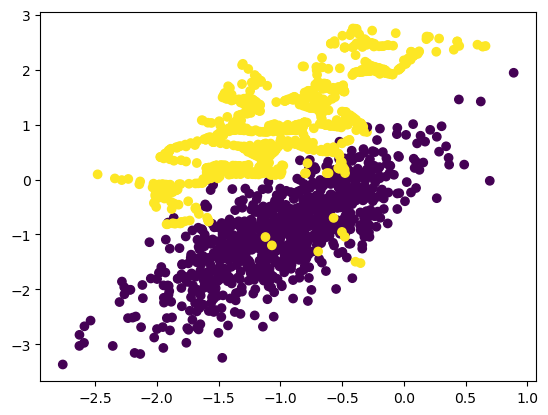

In [24]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

In [25]:
oversample_df['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

So, we have balanced the dataset by applying __SMOTE()__